## Work
1. 請改變 reduce_lr 的 patience 和 factor 並比較不同設定下，對訓練/驗證集的影響
2. 請將 optimizer 換成 Adam、RMSprop 搭配 reduce_lr 並比較訓練結果

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.layers import BatchNormalization

def build_mlp(input_shape, output_units=10, num_neurons=[256, 256, 256]):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
LEARNING_RATE = 1e-3
EPOCHS = 25 # IF you feel too run to finish, try to make it smaller
BATCH_SIZE = 1024 

In [7]:
# 載入 Callbacks
from keras.callbacks import ReduceLROnPlateau

optimizer_set = [keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=0.95),
                 keras.optimizers.Adam(lr=LEARNING_RATE),
                 keras.optimizers.RMSprop(lr=LEARNING_RATE)]

"""Code Here
建立實驗的比較組合
"""
reduce_lr_factor = [0.2, 0.5, 0.8]
redice_lr_patient = [3, 5, 10]

In [8]:
import itertools
results = {}
for i, (optim, reduce_factor, reduce_patient) in enumerate(itertools.product(optimizer_set, reduce_lr_factor, redice_lr_patient)):
    print("Numbers of exp: %i, reduce_factor: %.2f, reduce_patient: %i" % (i, reduce_factor, reduce_patient))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optim)
    
    """Code Here
    設定 reduce learning rate 的 callback function
    """
    reduce_lr = ReduceLROnPlateau(factor=reduce_factor, 
                                  min_lr=1e-12, 
                                  monitor='val_loss', 
                                  patience=reduce_patient, 
                                  verbose=1)
    
    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True,
              callbacks=[reduce_lr]
             )

    # Collect results
    exp_name_tag = ("exp-%s" % (i))
    results[exp_name_tag] = {'train-loss': model.history.history["loss"],
                             'valid-loss': model.history.history["val_loss"],
                             'train-acc': model.history.history["acc"],
                             'valid-acc': model.history.history["val_acc"]}

Numbers of exp: 0, reduce_factor: 0.20, reduce_patient: 3




_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 256)               786688    
_________________________________________________________________
batch_normalization_1 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               65792     
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 256)               65792     
_________________________________________________________________
batch_normaliz

50000/50000 [==============================] - 3s 51us/step - loss: 1.7639 - acc: 0.3864 - val_loss: 1.8847 - val_acc: 0.3649
Epoch 3/25
50000/50000 [==============================] - 3s 53us/step - loss: 1.6340 - acc: 0.4289 - val_loss: 1.7200 - val_acc: 0.4066
Epoch 4/25
50000/50000 [==============================] - 3s 52us/step - loss: 1.5572 - acc: 0.4546 - val_loss: 1.6442 - val_acc: 0.4232
Epoch 5/25
50000/50000 [==============================] - 3s 53us/step - loss: 1.5027 - acc: 0.4749 - val_loss: 1.5881 - val_acc: 0.4450
Epoch 6/25
50000/50000 [==============================] - 3s 52us/step - loss: 1.4563 - acc: 0.4893 - val_loss: 1.5789 - val_acc: 0.4393
Epoch 7/25
50000/50000 [==============================] - 3s 51us/step - loss: 1.4180 - acc: 0.5034 - val_loss: 1.5499 - val_acc: 0.4525
Epoch 8/25
50000/50000 [==============================] - 3s 51us/step - loss: 1.3848 - acc: 0.5158 - val_loss: 1.5315 - val_acc: 0.4642
Epoch 9/25
50000/50000 [============================

50000/50000 [==============================] - 3s 53us/step - loss: 1.0450 - acc: 0.6419 - val_loss: 1.4669 - val_acc: 0.4958
Numbers of exp: 3, reduce_factor: 0.50, reduce_patient: 3
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 256)               786688    
_________________________________________________________________
batch_normalization_10 (Batc (None, 256)               1024      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               65792     
_________________________________________________________________
batch_normalization_11 (Batc (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)   

50000/50000 [==============================] - 3s 54us/step - loss: 1.4237 - acc: 0.5043 - val_loss: 1.5635 - val_acc: 0.4531
Epoch 13/25
50000/50000 [==============================] - 3s 54us/step - loss: 1.4034 - acc: 0.5107 - val_loss: 1.5644 - val_acc: 0.4561
Epoch 14/25
50000/50000 [==============================] - 3s 53us/step - loss: 1.3854 - acc: 0.5177 - val_loss: 1.5453 - val_acc: 0.4581
Epoch 15/25
50000/50000 [==============================] - 3s 53us/step - loss: 1.3689 - acc: 0.5227 - val_loss: 1.5391 - val_acc: 0.4607
Epoch 16/25
50000/50000 [==============================] - 3s 53us/step - loss: 1.3531 - acc: 0.5281 - val_loss: 1.5320 - val_acc: 0.4624
Epoch 17/25
50000/50000 [==============================] - 3s 52us/step - loss: 1.3374 - acc: 0.5358 - val_loss: 1.5311 - val_acc: 0.4616
Epoch 18/25
50000/50000 [==============================] - 3s 52us/step - loss: 1.3230 - acc: 0.5390 - val_loss: 1.5216 - val_acc: 0.4652
Epoch 19/25
50000/50000 [=====================

Train on 50000 samples, validate on 10000 samples
Epoch 1/25
50000/50000 [==============================] - 4s 84us/step - loss: 2.3946 - acc: 0.2234 - val_loss: 2.4423 - val_acc: 0.2641
Epoch 2/25
50000/50000 [==============================] - 3s 51us/step - loss: 1.9039 - acc: 0.3451 - val_loss: 1.9386 - val_acc: 0.3424
Epoch 3/25
50000/50000 [==============================] - 3s 51us/step - loss: 1.7607 - acc: 0.3834 - val_loss: 1.7921 - val_acc: 0.3849
Epoch 4/25
50000/50000 [==============================] - 3s 51us/step - loss: 1.6798 - acc: 0.4118 - val_loss: 1.7398 - val_acc: 0.3974
Epoch 5/25
50000/50000 [==============================] - 3s 50us/step - loss: 1.6255 - acc: 0.4316 - val_loss: 1.6897 - val_acc: 0.4139
Epoch 6/25
50000/50000 [==============================] - 3s 52us/step - loss: 1.5806 - acc: 0.4478 - val_loss: 1.6592 - val_acc: 0.4229
Epoch 7/25
50000/50000 [==============================] - 3s 52us/step - loss: 1.5465 - acc: 0.4606 - val_loss: 1.6338 - val_acc

50000/50000 [==============================] - 3s 52us/step - loss: 1.2200 - acc: 0.5785 - val_loss: 1.4767 - val_acc: 0.4816
Epoch 25/25
50000/50000 [==============================] - 3s 53us/step - loss: 1.2086 - acc: 0.5818 - val_loss: 1.4737 - val_acc: 0.4795
Numbers of exp: 8, reduce_factor: 0.80, reduce_patient: 10
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 256)               786688    
_________________________________________________________________
batch_normalization_25 (Batc (None, 256)               1024      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               65792     
_________________________________________________________________
batch_normalizati

50000/50000 [==============================] - 3s 54us/step - loss: 0.9023 - acc: 0.6918 - val_loss: 1.3569 - val_acc: 0.5211
Epoch 12/25
50000/50000 [==============================] - 3s 54us/step - loss: 0.8820 - acc: 0.7022 - val_loss: 1.3641 - val_acc: 0.5151
Epoch 13/25
50000/50000 [==============================] - 3s 55us/step - loss: 0.8613 - acc: 0.7083 - val_loss: 1.3582 - val_acc: 0.5229

Epoch 00013: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.
Epoch 14/25
50000/50000 [==============================] - 3s 54us/step - loss: 0.8198 - acc: 0.7270 - val_loss: 1.3063 - val_acc: 0.5455
Epoch 15/25
50000/50000 [==============================] - 3s 55us/step - loss: 0.8085 - acc: 0.7312 - val_loss: 1.3070 - val_acc: 0.5419
Epoch 16/25
50000/50000 [==============================] - 3s 58us/step - loss: 0.8026 - acc: 0.7339 - val_loss: 1.3117 - val_acc: 0.5428
Epoch 17/25
50000/50000 [==============================] - 3s 56us/step - loss: 0.7971 - acc: 0.7369 -

Train on 50000 samples, validate on 10000 samples
Epoch 1/25
50000/50000 [==============================] - 6s 110us/step - loss: 2.9309 - acc: 0.1195 - val_loss: 2.8813 - val_acc: 0.1363
Epoch 2/25
50000/50000 [==============================] - 3s 58us/step - loss: 2.8078 - acc: 0.1367 - val_loss: 2.7982 - val_acc: 0.1500
Epoch 3/25
50000/50000 [==============================] - 3s 60us/step - loss: 2.7350 - acc: 0.1511 - val_loss: 2.7401 - val_acc: 0.1595
Epoch 4/25
50000/50000 [==============================] - 3s 55us/step - loss: 2.6830 - acc: 0.1608 - val_loss: 2.6944 - val_acc: 0.1680
Epoch 5/25
50000/50000 [==============================] - 3s 54us/step - loss: 2.6406 - acc: 0.1702 - val_loss: 2.6557 - val_acc: 0.1724
Epoch 6/25
50000/50000 [==============================] - 3s 55us/step - loss: 2.6052 - acc: 0.1770 - val_loss: 2.6230 - val_acc: 0.1785
Epoch 7/25
50000/50000 [==============================] - 3s 55us/step - loss: 2.5754 - acc: 0.1829 - val_loss: 2.5950 - val_ac

50000/50000 [==============================] - 3s 57us/step - loss: 2.3263 - acc: 0.2389 - val_loss: 2.3162 - val_acc: 0.2447
Epoch 25/25
50000/50000 [==============================] - 3s 57us/step - loss: 2.3174 - acc: 0.2417 - val_loss: 2.3085 - val_acc: 0.2471
Numbers of exp: 13, reduce_factor: 0.50, reduce_patient: 5
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_14 (InputLayer)        (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 256)               786688    
_________________________________________________________________
batch_normalization_40 (Batc (None, 256)               1024      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               65792     
_________________________________________________________________
batch_normalizati

Epoch 12/25
50000/50000 [==============================] - 3s 53us/step - loss: 2.4889 - acc: 0.1952 - val_loss: 2.4982 - val_acc: 0.1937
Epoch 13/25
50000/50000 [==============================] - 3s 52us/step - loss: 2.4721 - acc: 0.1982 - val_loss: 2.4822 - val_acc: 0.1979
Epoch 14/25
50000/50000 [==============================] - 3s 56us/step - loss: 2.4556 - acc: 0.2020 - val_loss: 2.4669 - val_acc: 0.2008
Epoch 15/25
50000/50000 [==============================] - 3s 56us/step - loss: 2.4393 - acc: 0.2054 - val_loss: 2.4529 - val_acc: 0.2039
Epoch 16/25
50000/50000 [==============================] - 3s 56us/step - loss: 2.4266 - acc: 0.2097 - val_loss: 2.4395 - val_acc: 0.2060
Epoch 17/25
50000/50000 [==============================] - 3s 55us/step - loss: 2.4118 - acc: 0.2126 - val_loss: 2.4263 - val_acc: 0.2086
Epoch 18/25
50000/50000 [==============================] - 3s 54us/step - loss: 2.3998 - acc: 0.2149 - val_loss: 2.4139 - val_acc: 0.2111
Epoch 19/25
50000/50000 [=========

Train on 50000 samples, validate on 10000 samples
Epoch 1/25
50000/50000 [==============================] - 6s 116us/step - loss: 2.8855 - acc: 0.1203 - val_loss: 2.7979 - val_acc: 0.1384
Epoch 2/25
50000/50000 [==============================] - 3s 57us/step - loss: 2.7700 - acc: 0.1370 - val_loss: 2.7288 - val_acc: 0.1548
Epoch 3/25
50000/50000 [==============================] - 3s 56us/step - loss: 2.7015 - acc: 0.1486 - val_loss: 2.6780 - val_acc: 0.1650
Epoch 4/25
50000/50000 [==============================] - 3s 56us/step - loss: 2.6547 - acc: 0.1581 - val_loss: 2.6388 - val_acc: 0.1736
Epoch 5/25
50000/50000 [==============================] - 3s 58us/step - loss: 2.6173 - acc: 0.1646 - val_loss: 2.6048 - val_acc: 0.1797
Epoch 6/25
50000/50000 [==============================] - 3s 57us/step - loss: 2.5851 - acc: 0.1722 - val_loss: 2.5762 - val_acc: 0.1835
Epoch 7/25
50000/50000 [==============================] - 3s 55us/step - loss: 2.5583 - acc: 0.1779 - val_loss: 2.5506 - val_ac

50000/50000 [==============================] - 3s 59us/step - loss: 2.3297 - acc: 0.2310 - val_loss: 2.3588 - val_acc: 0.2286
Epoch 25/25
50000/50000 [==============================] - 3s 56us/step - loss: 2.3214 - acc: 0.2316 - val_loss: 2.3505 - val_acc: 0.2306
Numbers of exp: 18, reduce_factor: 0.20, reduce_patient: 3
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_19 (InputLayer)        (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 256)               786688    
_________________________________________________________________
batch_normalization_55 (Batc (None, 256)               1024      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               65792     
_________________________________________________________________
batch_normalizati

50000/50000 [==============================] - 3s 54us/step - loss: 2.2961 - acc: 0.2378 - val_loss: 2.2805 - val_acc: 0.2410
Epoch 10/25
50000/50000 [==============================] - 3s 54us/step - loss: 2.2626 - acc: 0.2448 - val_loss: 2.2503 - val_acc: 0.2511
Epoch 11/25
50000/50000 [==============================] - 3s 53us/step - loss: 2.2313 - acc: 0.2549 - val_loss: 2.2227 - val_acc: 0.2586
Epoch 12/25
50000/50000 [==============================] - 3s 54us/step - loss: 2.2024 - acc: 0.2622 - val_loss: 2.1972 - val_acc: 0.2670
Epoch 13/25
50000/50000 [==============================] - 3s 54us/step - loss: 2.1772 - acc: 0.2682 - val_loss: 2.1739 - val_acc: 0.2728
Epoch 14/25
50000/50000 [==============================] - 3s 55us/step - loss: 2.1513 - acc: 0.2746 - val_loss: 2.1528 - val_acc: 0.2784
Epoch 15/25
50000/50000 [==============================] - 3s 55us/step - loss: 2.1300 - acc: 0.2816 - val_loss: 2.1320 - val_acc: 0.2839
Epoch 16/25
50000/50000 [=====================

Train on 50000 samples, validate on 10000 samples
Epoch 1/25
50000/50000 [==============================] - 6s 129us/step - loss: 3.0189 - acc: 0.1013 - val_loss: 2.9436 - val_acc: 0.1098
Epoch 2/25
50000/50000 [==============================] - 3s 53us/step - loss: 2.8429 - acc: 0.1208 - val_loss: 2.8339 - val_acc: 0.1370
Epoch 3/25
50000/50000 [==============================] - 3s 53us/step - loss: 2.7026 - acc: 0.1460 - val_loss: 2.7530 - val_acc: 0.1582
Epoch 4/25
50000/50000 [==============================] - 3s 68us/step - loss: 2.5919 - acc: 0.1685 - val_loss: 2.6722 - val_acc: 0.1754
Epoch 5/25
50000/50000 [==============================] - 3s 57us/step - loss: 2.5046 - acc: 0.1895 - val_loss: 2.5872 - val_acc: 0.1914
Epoch 6/25
50000/50000 [==============================] - 3s 56us/step - loss: 2.4349 - acc: 0.2056 - val_loss: 2.5108 - val_acc: 0.2056
Epoch 7/25
50000/50000 [==============================] - 3s 54us/step - loss: 2.3766 - acc: 0.2202 - val_loss: 2.4418 - val_ac

50000/50000 [==============================] - 3s 53us/step - loss: 2.0184 - acc: 0.3137 - val_loss: 2.0535 - val_acc: 0.3081
Epoch 25/25
50000/50000 [==============================] - 3s 52us/step - loss: 2.0043 - acc: 0.3190 - val_loss: 2.0417 - val_acc: 0.3123
Numbers of exp: 23, reduce_factor: 0.50, reduce_patient: 10
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_24 (InputLayer)        (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 256)               786688    
_________________________________________________________________
batch_normalization_70 (Batc (None, 256)               1024      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               65792     
_________________________________________________________________
batch_normalizat

50000/50000 [==============================] - 3s 57us/step - loss: 2.2671 - acc: 0.2484 - val_loss: 2.2616 - val_acc: 0.2480
Epoch 12/25
50000/50000 [==============================] - 3s 57us/step - loss: 2.2359 - acc: 0.2563 - val_loss: 2.2339 - val_acc: 0.2517
Epoch 13/25
50000/50000 [==============================] - 3s 57us/step - loss: 2.2074 - acc: 0.2630 - val_loss: 2.2088 - val_acc: 0.2588
Epoch 14/25
50000/50000 [==============================] - 3s 57us/step - loss: 2.1810 - acc: 0.2701 - val_loss: 2.1848 - val_acc: 0.2658
Epoch 15/25
50000/50000 [==============================] - 3s 55us/step - loss: 2.1562 - acc: 0.2762 - val_loss: 2.1642 - val_acc: 0.2716
Epoch 16/25
50000/50000 [==============================] - 3s 55us/step - loss: 2.1338 - acc: 0.2824 - val_loss: 2.1436 - val_acc: 0.2771
Epoch 17/25
50000/50000 [==============================] - 3s 57us/step - loss: 2.1117 - acc: 0.2870 - val_loss: 2.1259 - val_acc: 0.2810
Epoch 18/25
50000/50000 [=====================

Train on 50000 samples, validate on 10000 samples
Epoch 1/25
50000/50000 [==============================] - 7s 148us/step - loss: 2.8830 - acc: 0.1207 - val_loss: 2.7899 - val_acc: 0.1376
Epoch 2/25
50000/50000 [==============================] - 3s 53us/step - loss: 2.7449 - acc: 0.1442 - val_loss: 2.6860 - val_acc: 0.1644
Epoch 3/25
50000/50000 [==============================] - 3s 53us/step - loss: 2.6415 - acc: 0.1668 - val_loss: 2.6051 - val_acc: 0.1829
Epoch 4/25
50000/50000 [==============================] - 3s 53us/step - loss: 2.5566 - acc: 0.1857 - val_loss: 2.5331 - val_acc: 0.1976
Epoch 5/25
50000/50000 [==============================] - 3s 52us/step - loss: 2.4876 - acc: 0.2012 - val_loss: 2.4692 - val_acc: 0.2101
Epoch 6/25
50000/50000 [==============================] - 3s 55us/step - loss: 2.4290 - acc: 0.2149 - val_loss: 2.4138 - val_acc: 0.2231
Epoch 7/25
50000/50000 [==============================] - 3s 55us/step - loss: 2.3764 - acc: 0.2267 - val_loss: 2.3664 - val_ac

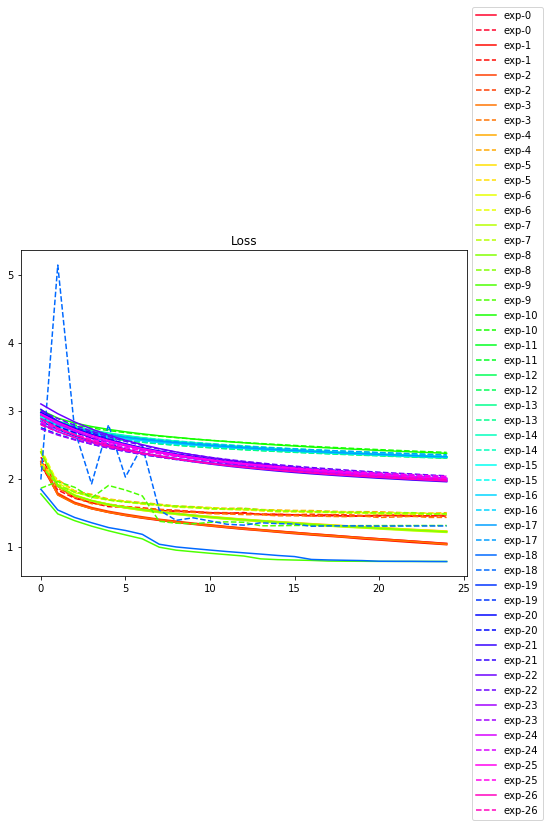

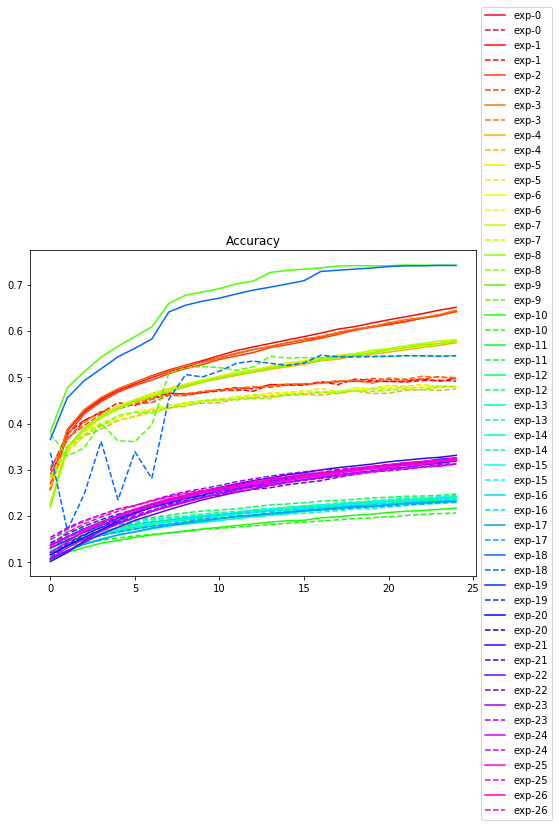

In [9]:
import matplotlib.pyplot as plt
import matplotlib.cm as mplcm
import matplotlib.colors as colors
%matplotlib inline
NUM_COLORS = len(results.keys())

cm = plt.get_cmap('gist_rainbow')
cNorm  = colors.Normalize(vmin=0, vmax=NUM_COLORS-1)
scalarMap = mplcm.ScalarMappable(norm=cNorm, cmap=cm)
color_bar = [scalarMap.to_rgba(i) for i in range(NUM_COLORS)]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()